In [6]:
# current date, for retrieving data from proper location.
year = "2023"
month = "August"
day = "3"

## Imports and initialization

In [7]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [9]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

# Today's Work

In [10]:
atomlocs = [2, 2, 3, 3, 1]

In [11]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

In [12]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

## 275 MHz 

<Figure size 30000x9600 with 0 Axes>

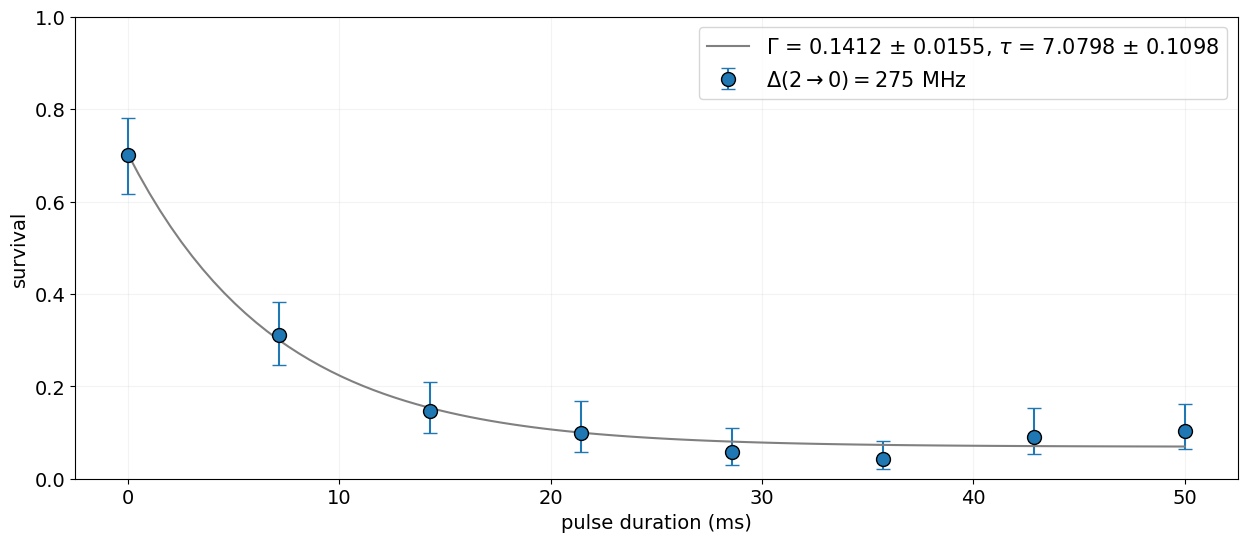

In [14]:
##pulse duration
reloadMyModules(2)
fileId = 22
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 275 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_275 = decay_constant
gamma_275_unc = decay_constant_uncertainty
tau_275 = one_over_e_time
tau_275_unc = one_over_e_time_uncertainty

## 200 MHz

<Figure size 30000x9600 with 0 Axes>

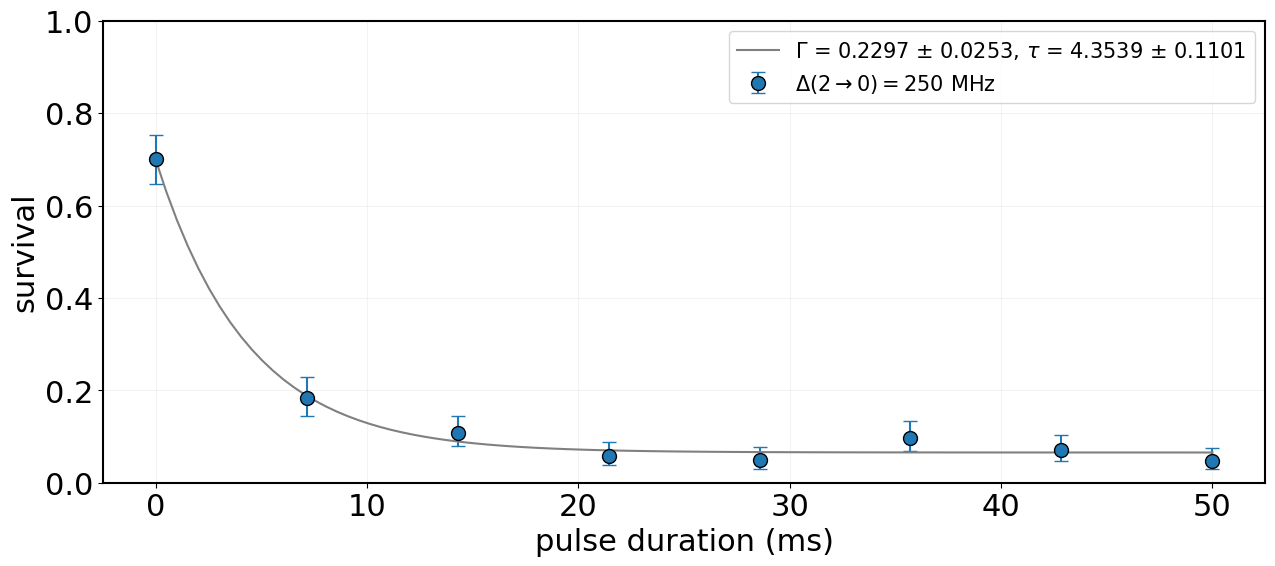

In [15]:
##pulse duration
reloadMyModules(2)
fileId = 25
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 250 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_200 = decay_constant
gamma_200_unc = decay_constant_uncertainty
tau_200 = one_over_e_time
tau_200_unc = one_over_e_time_uncertainty

<Figure size 30000x9600 with 0 Axes>

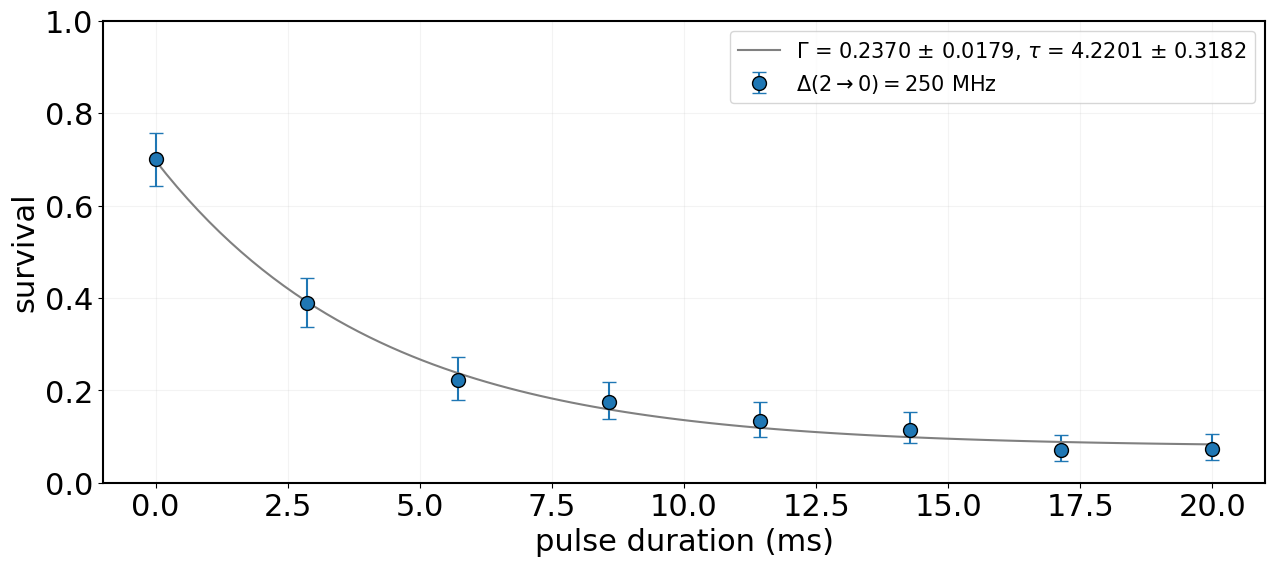

In [16]:
##pulse duration
reloadMyModules(2)
fileId = 45
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / (decay_constant ** 2)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 250 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

## 150 MHz

<Figure size 30000x9600 with 0 Axes>

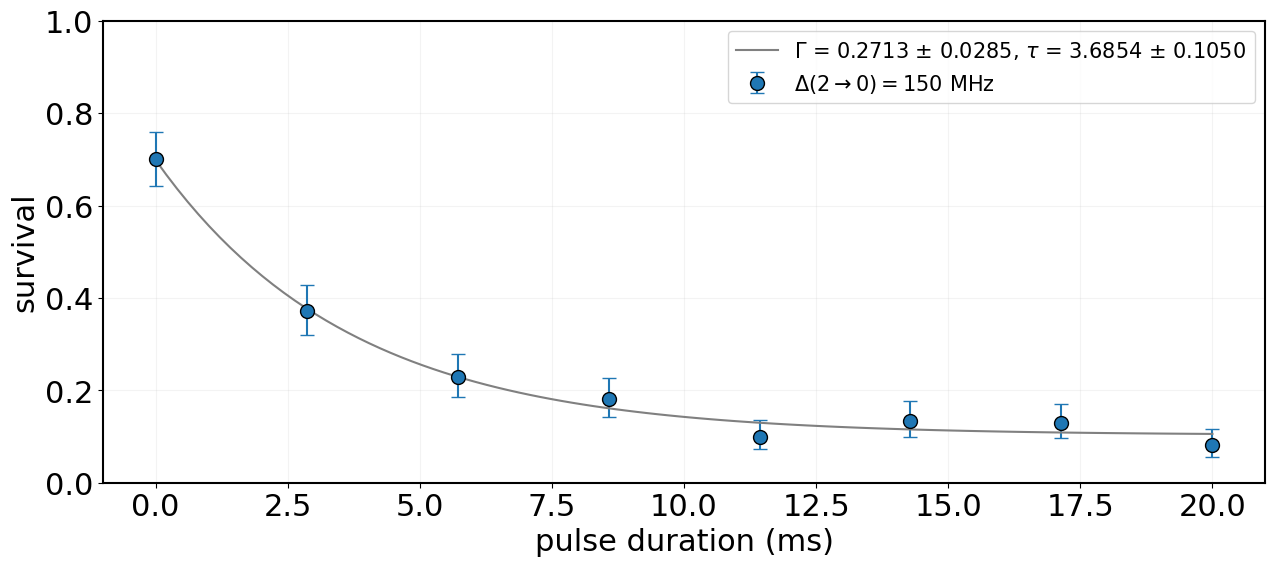

In [17]:
##pulse duration
reloadMyModules(2)
fileId = 46
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 150 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_150 = decay_constant
gamma_150_unc = decay_constant_uncertainty
tau_150 = one_over_e_time
tau_150_unc = one_over_e_time_uncertainty

## 100 MHz

<Figure size 30000x9600 with 0 Axes>

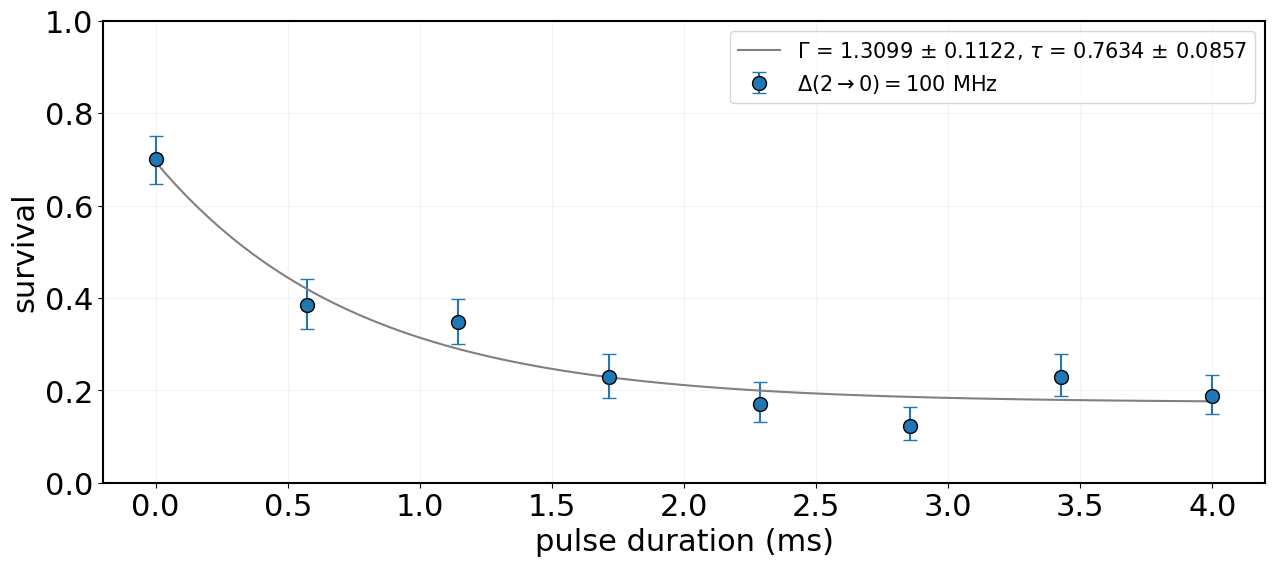

In [18]:
##pulse duration
reloadMyModules(2)
fileId = 52
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = pcov[1, 1]
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 100 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_100 = decay_constant
gamma_100_unc = decay_constant_uncertainty
tau_100 = one_over_e_time
tau_100_unc = one_over_e_time_uncertainty

## 75 MHz

<Figure size 30000x9600 with 0 Axes>

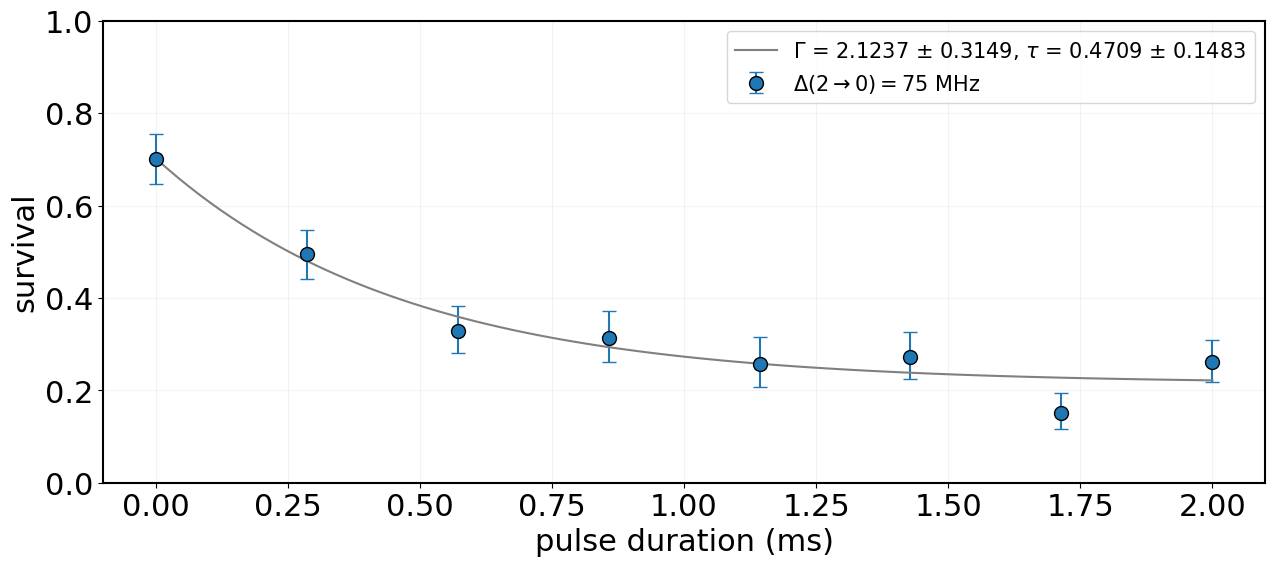

In [19]:
##pulse duration
reloadMyModules(3)
fileId = 27
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = pcov[1, 1]
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 75 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_75 = decay_constant
gamma_75_unc = decay_constant_uncertainty
tau_75 = one_over_e_time
tau_75_unc = one_over_e_time_uncertainty

## 50 MHz

<Figure size 30000x9600 with 0 Axes>

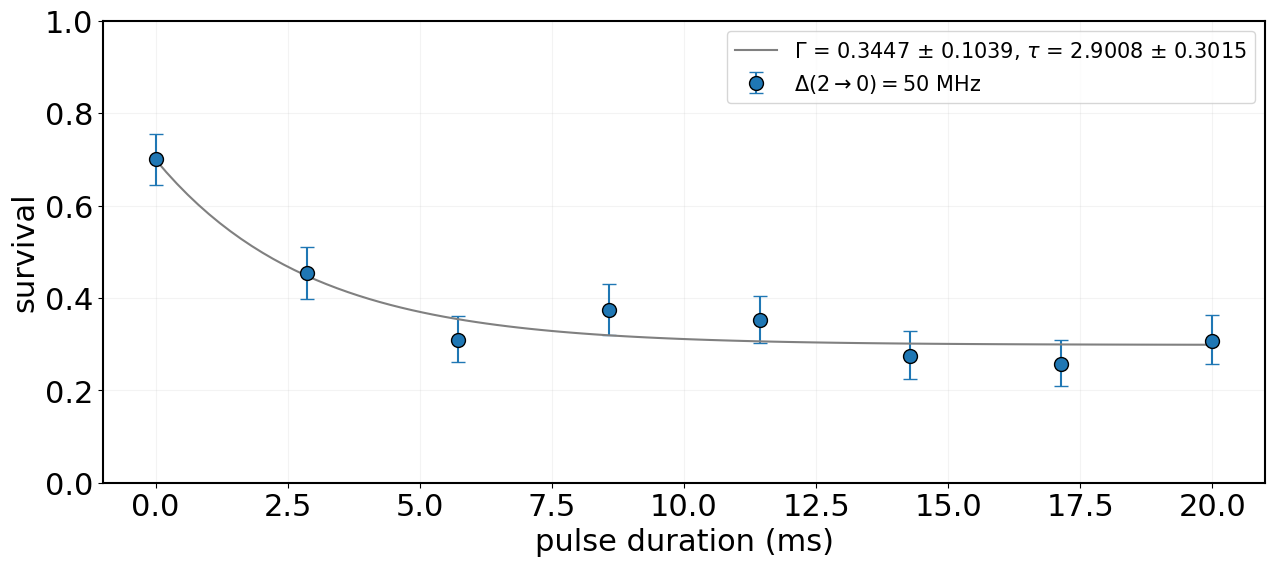

In [20]:
##pulse duration
reloadMyModules(3)
fileId = 1
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 50 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_50 = decay_constant
gamma_50_unc = decay_constant_uncertainty
tau_50 = one_over_e_time
tau_50_unc = one_over_e_time_uncertainty

<Figure size 30000x9600 with 0 Axes>

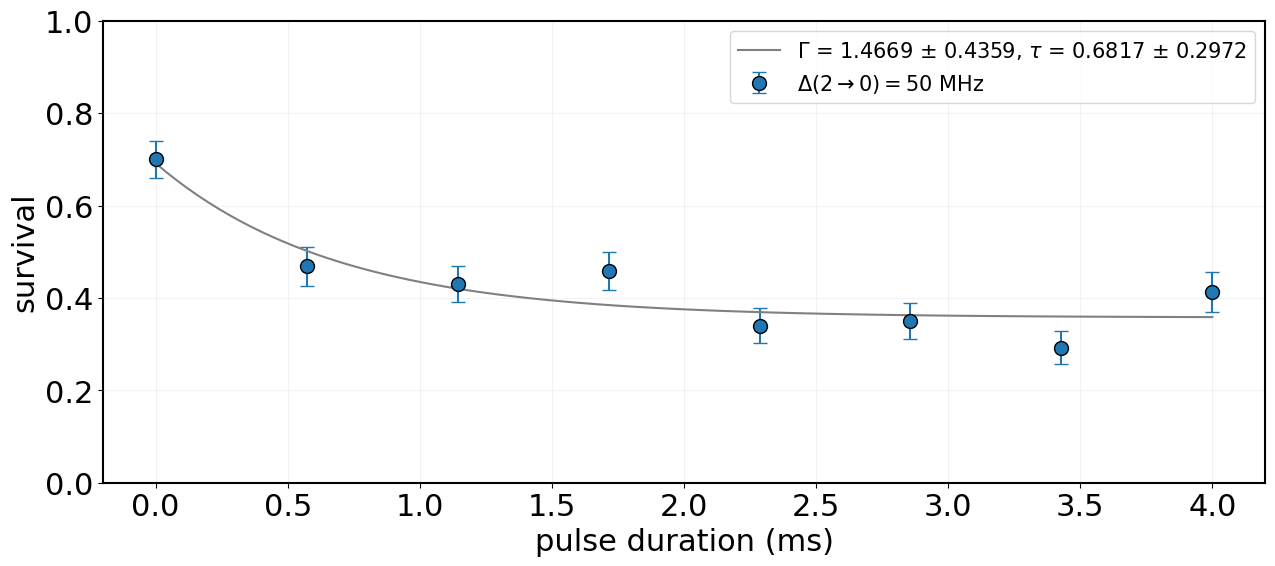

In [21]:
##pulse duration
reloadMyModules(3)
fileId = 39
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = pcov[1, 1]
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 50 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_50 = decay_constant
gamma_50_unc = decay_constant_uncertainty
tau_50 = one_over_e_time
tau_50_unc = one_over_e_time_uncertainty

## 25 MHz

<Figure size 30000x9600 with 0 Axes>

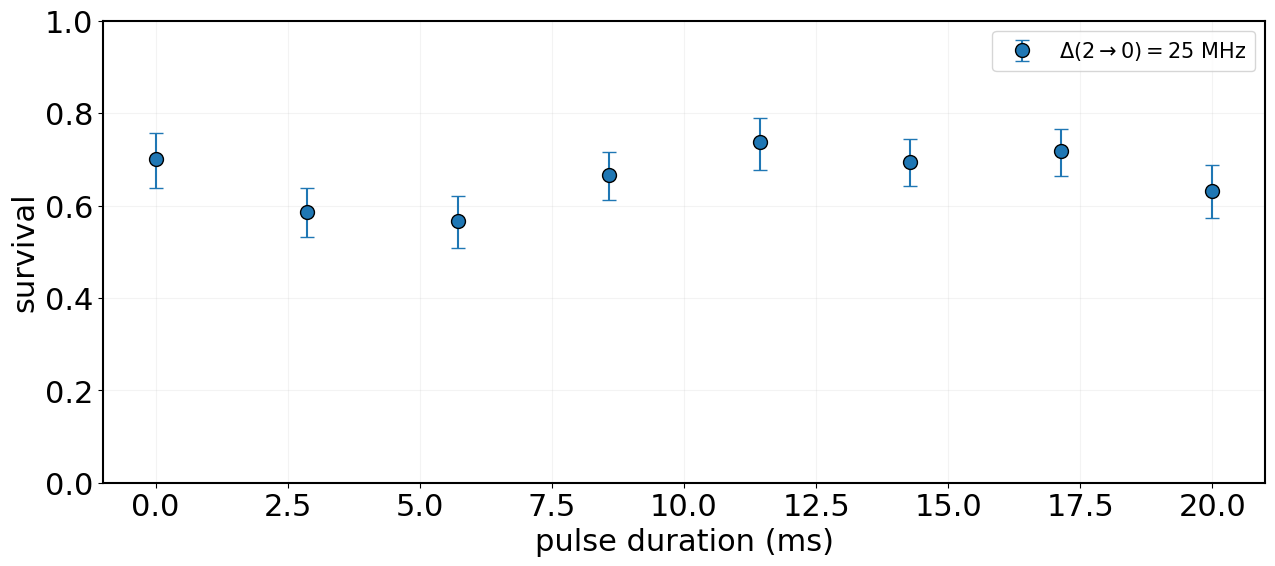

In [22]:
##pulse duration
reloadMyModules(3)
fileId = 2
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 25 \ \mathrm{MHz}$')
# plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


## 300 MHz

<Figure size 30000x9600 with 0 Axes>

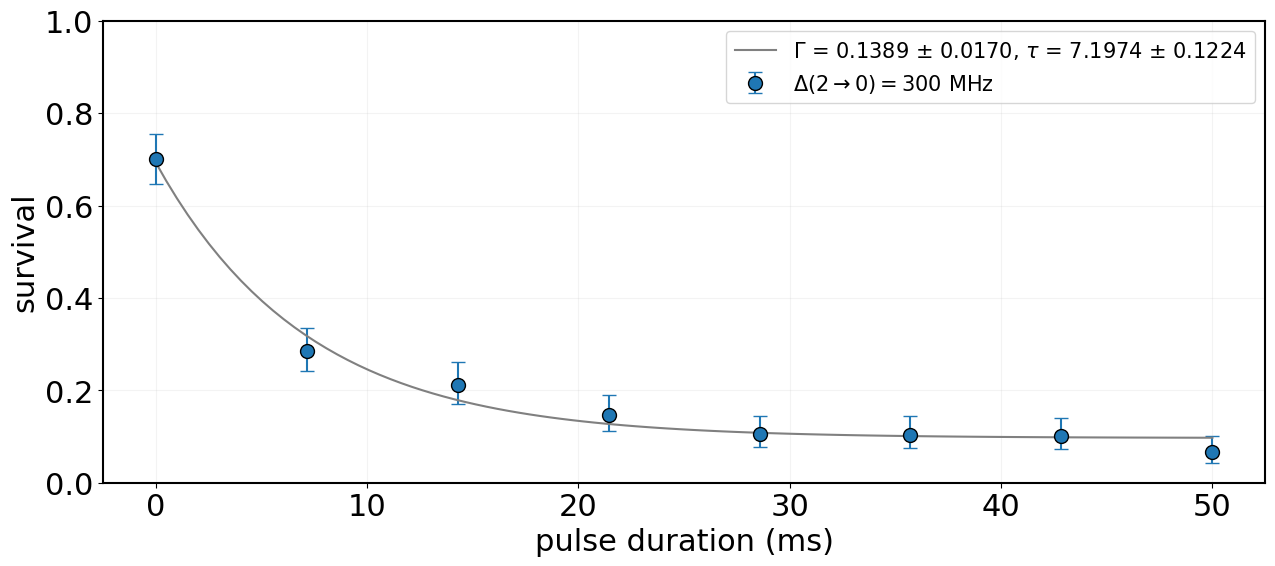

In [23]:
##pulse duration
reloadMyModules(3)
fileId = 16
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 300 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_300 = decay_constant
gamma_300_unc = decay_constant_uncertainty/2
tau_300 = one_over_e_time
tau_300_unc = one_over_e_time_uncertainty

## 125 MHz

<Figure size 30000x9600 with 0 Axes>

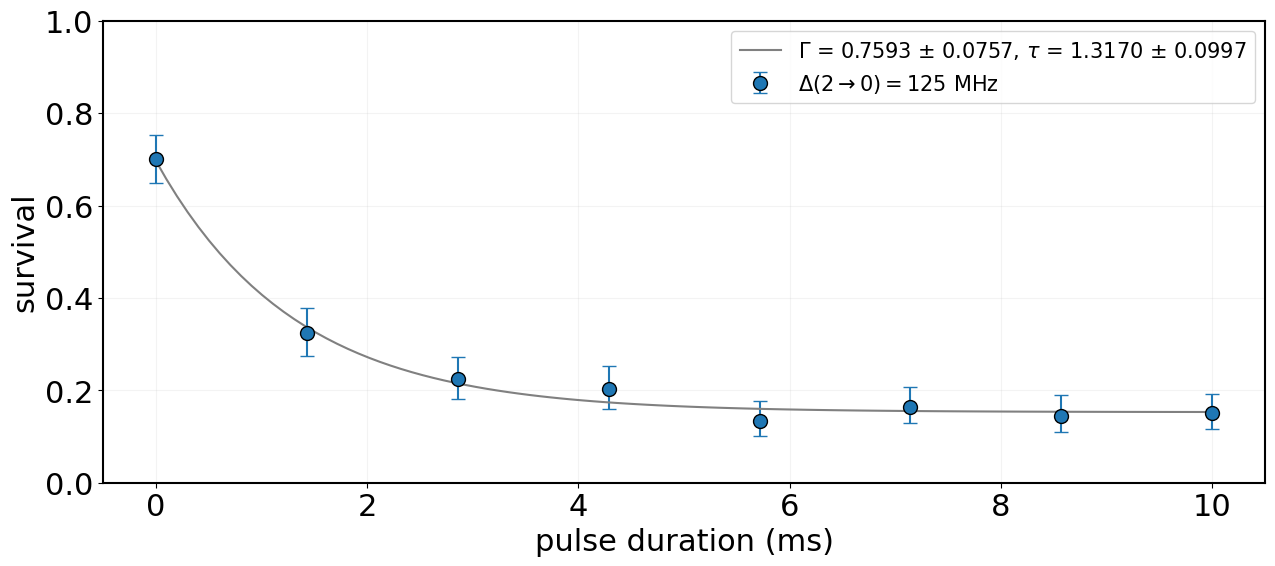

In [24]:
##pulse duration
reloadMyModules(3)
fileId = 10
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 125 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_125 = decay_constant
gamma_125_unc = decay_constant_uncertainty
tau_125 = one_over_e_time
tau_125_unc = one_over_e_time_uncertainty

## 175 MHz

<Figure size 30000x9600 with 0 Axes>

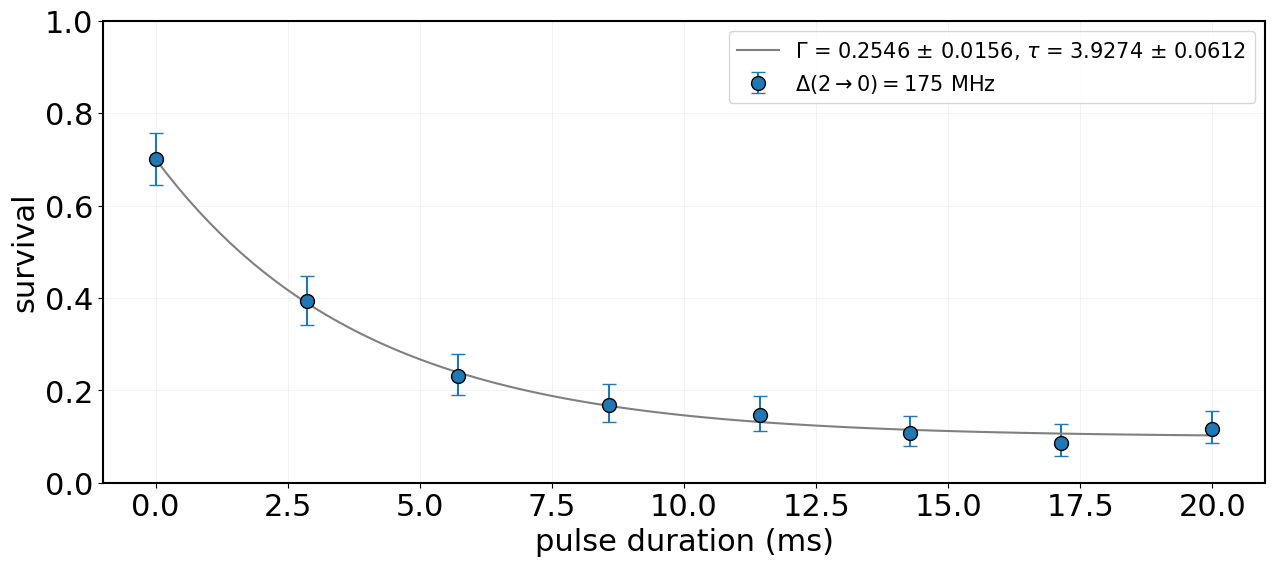

In [25]:
##pulse duration
reloadMyModules(3)
fileId = 11
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 175 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_175 = decay_constant
gamma_175_unc = decay_constant_uncertainty
tau_175 = one_over_e_time
tau_175_unc = one_over_e_time_uncertainty

## 225 MHz

<Figure size 30000x9600 with 0 Axes>

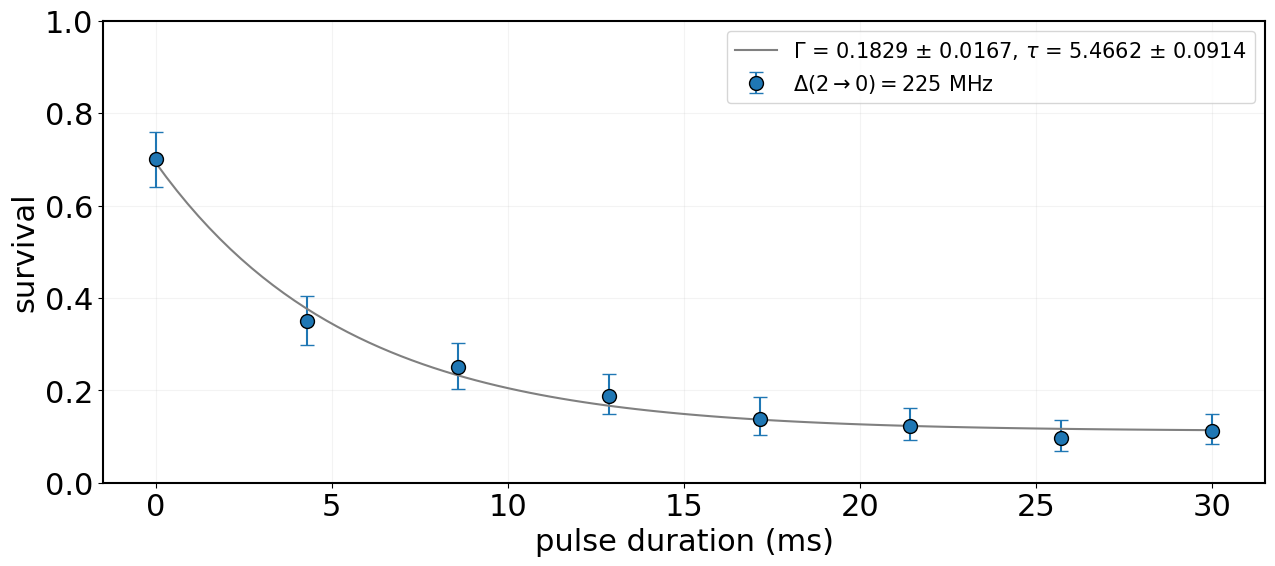

In [26]:
##pulse duration
reloadMyModules(3)
fileId = 13
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 225 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_225 = decay_constant
gamma_225_unc = decay_constant_uncertainty
tau_225 = one_over_e_time
tau_225_unc = one_over_e_time_uncertainty

## 250 MHz

<Figure size 30000x9600 with 0 Axes>

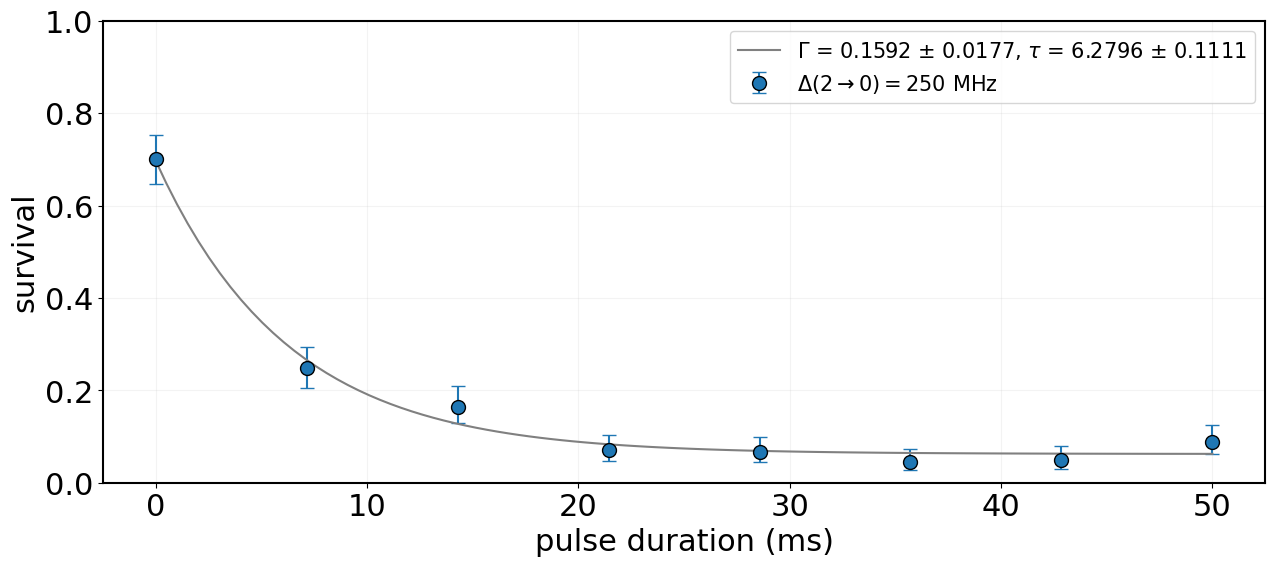

In [27]:
reloadMyModules(3)
##pulse duration
fileId = 14
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 250 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_250 = decay_constant
gamma_250_unc = decay_constant_uncertainty
tau_250 = one_over_e_time
tau_250_unc = one_over_e_time_uncertainty

## 62.5 MHz

<Figure size 30000x9600 with 0 Axes>

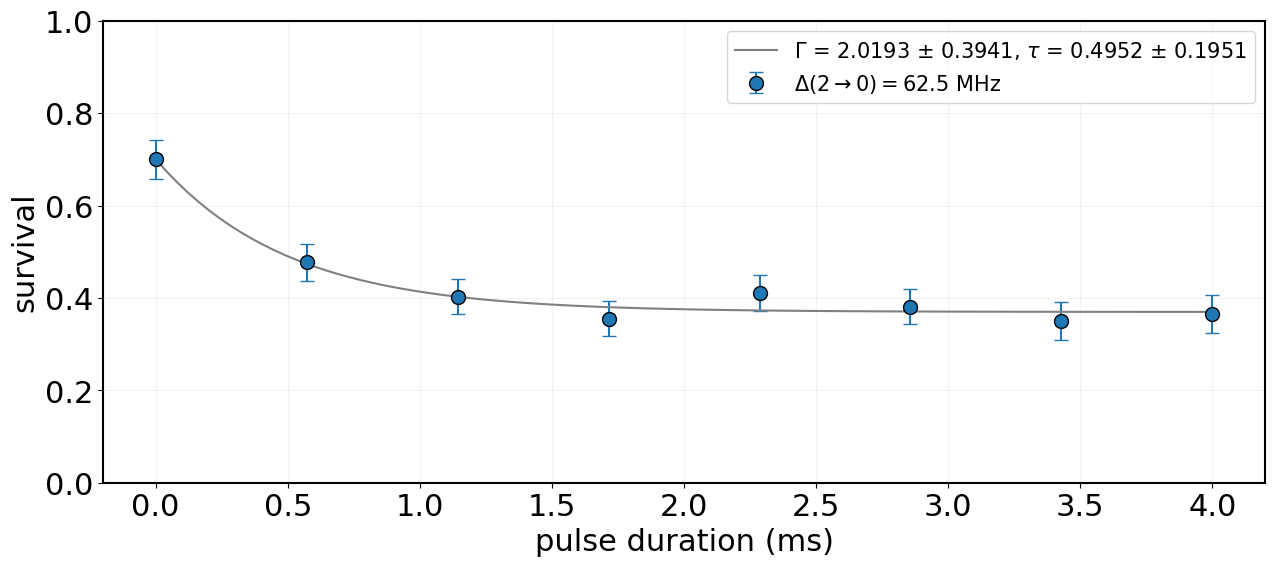

In [28]:
##pulse duration
reloadMyModules(3)
fileId = 41
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
avgTferData1[6] = 0.35
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 62.5 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_63 = decay_constant
gamma_63_unc = decay_constant_uncertainty
tau_63 = one_over_e_time
tau_63_unc = one_over_e_time_uncertainty

## 87.5 MHz

<Figure size 30000x9600 with 0 Axes>

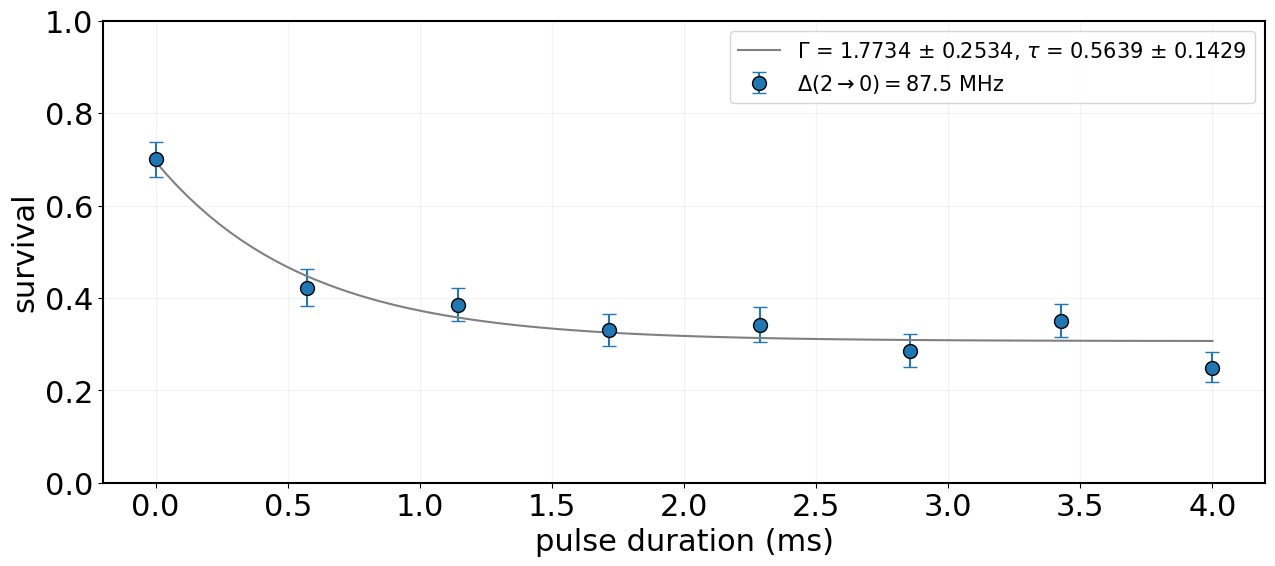

In [29]:
##pulse duration
reloadMyModules(3)
fileId = 46
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
avgTferData1[6] = 0.35
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = pcov[1, 1]
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 87.5 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_87 = decay_constant
gamma_87_unc = decay_constant_uncertainty
tau_87 = one_over_e_time
tau_87_unc = one_over_e_time_uncertainty

## 37.5 MHz

<Figure size 30000x9600 with 0 Axes>

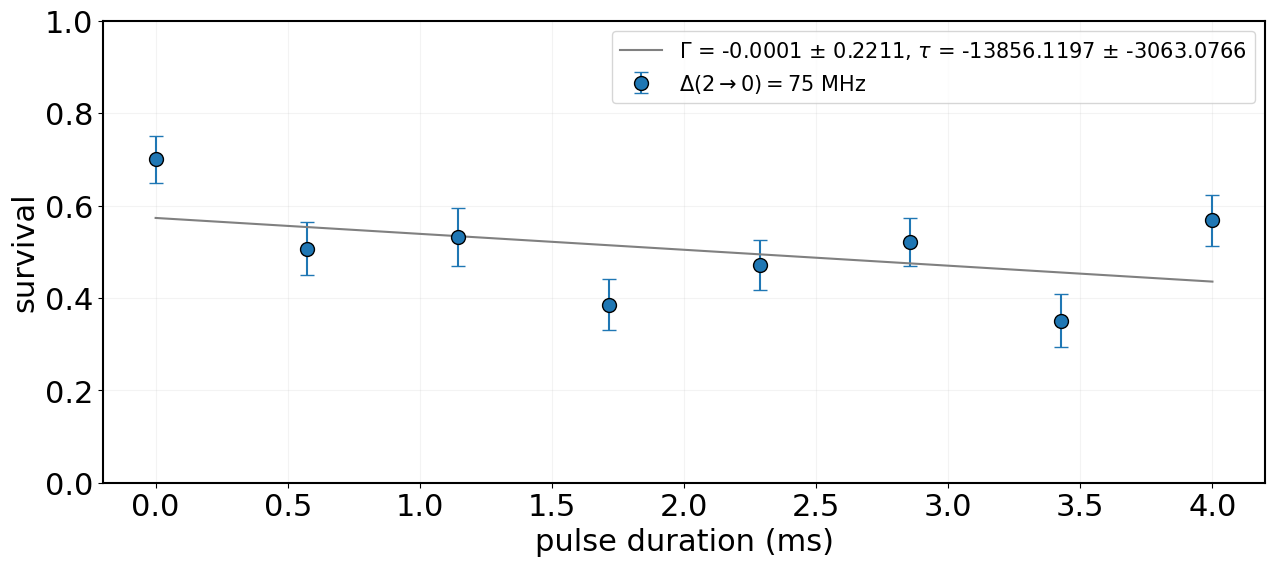

In [30]:
##pulse duration
reloadMyModules(3)
fileId = 48
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.7
avgTferData1[6] = 0.35
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = pcov[1, 1]
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 75 \ \mathrm{MHz}$')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

# gamma_87 = decay_constant
# gamma_87_unc = decay_constant_uncertainty
# tau_87 = one_over_e_time
# tau_87_unc = one_over_e_time_uncertainty

### File 50 (2_0_rate_measurement):  

Number of Pictures: 6000; Picture Dimensions: 5 x 10
Variations: 15;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 23:24:2: on (Y-M-D) 2023-8-3, And ended at 23:41:19: on 2023-8-3
Experiment Notes:  



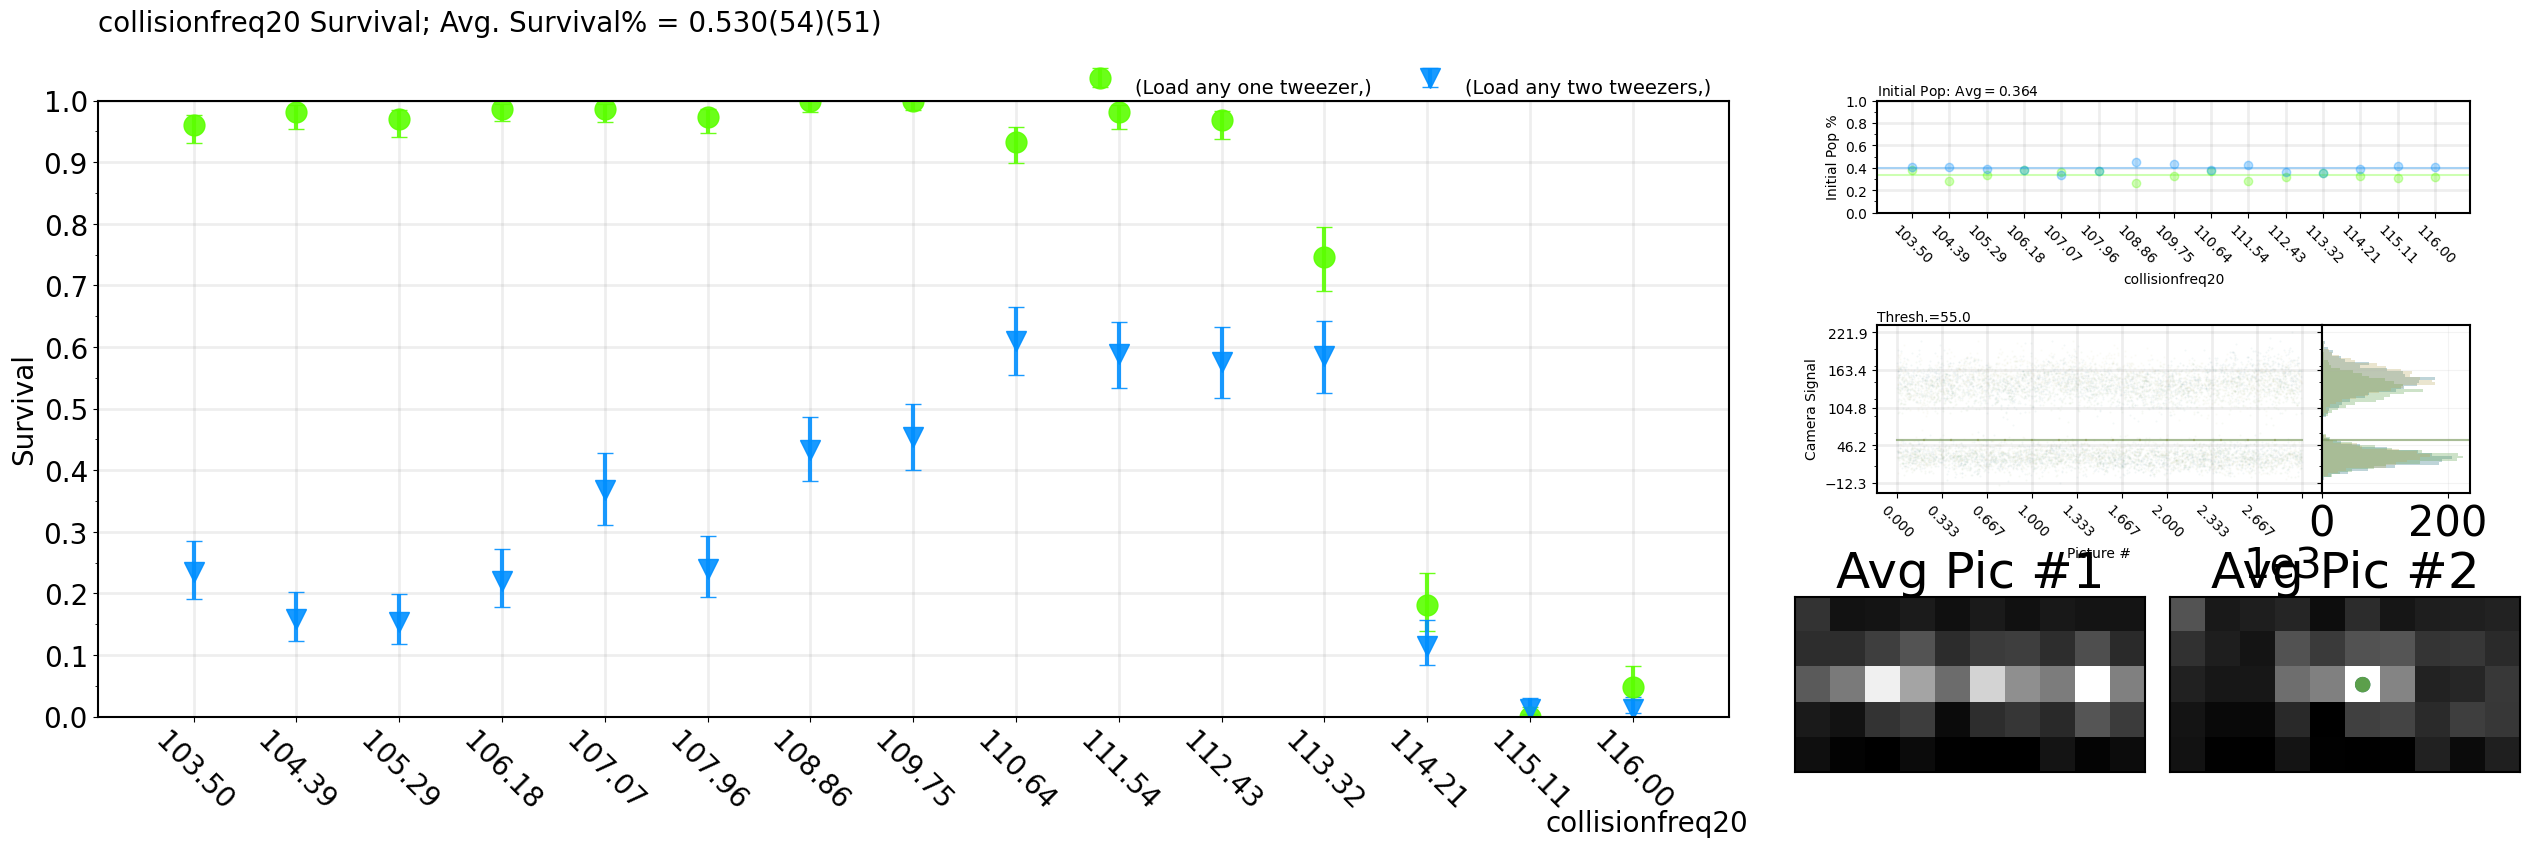

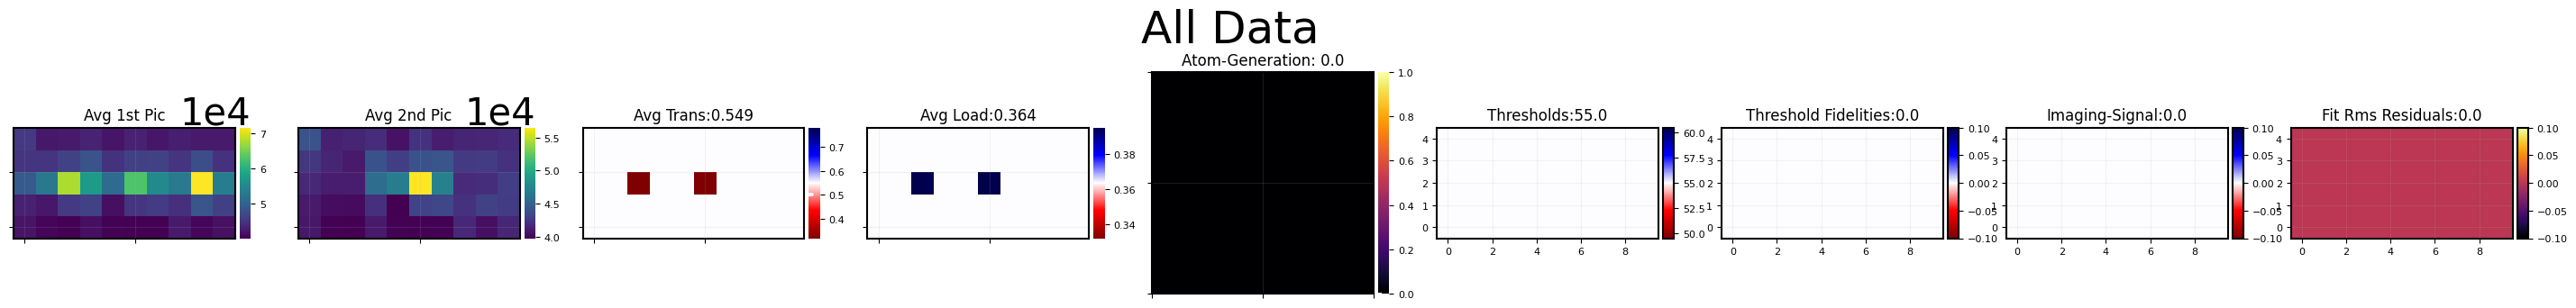

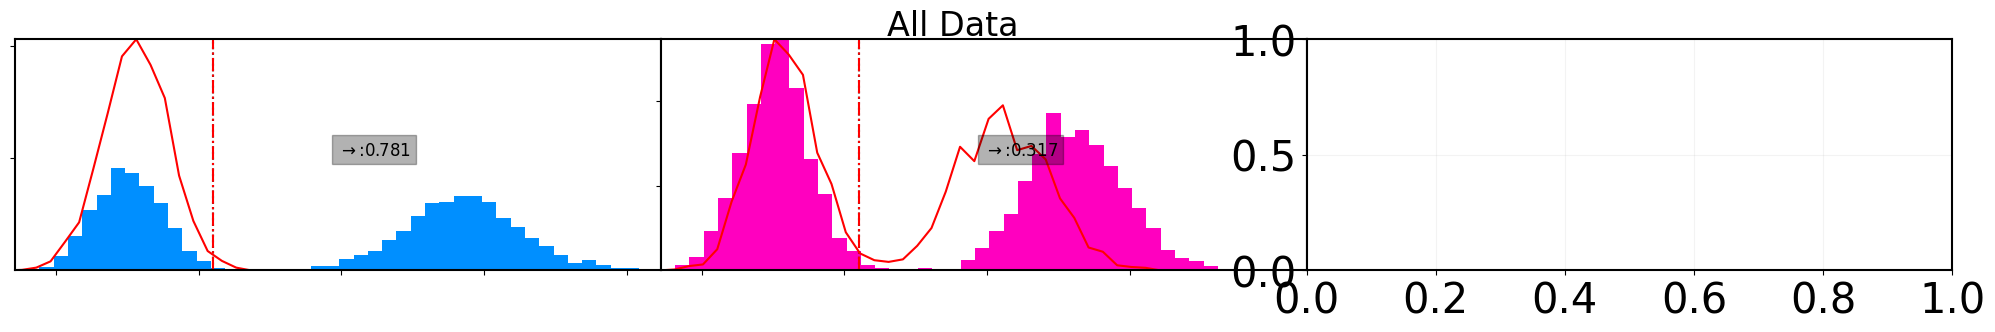

In [271]:
mp.Transfer(50, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 55)]); 

Number of Pictures: 6000; Picture Dimensions: 5 x 10
Variations: 15;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 23:1:49: on (Y-M-D) 2023-8-3, And ended at 23:19:4: on 2023-8-3
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 6000; Picture Dimensions: 5 x 10
Variations: 15;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 23:1:49: on (Y-M-D) 2023-8-3, And ended at 23:19:4: on 2023-8-3
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 30000x9600 with 0 Axes>

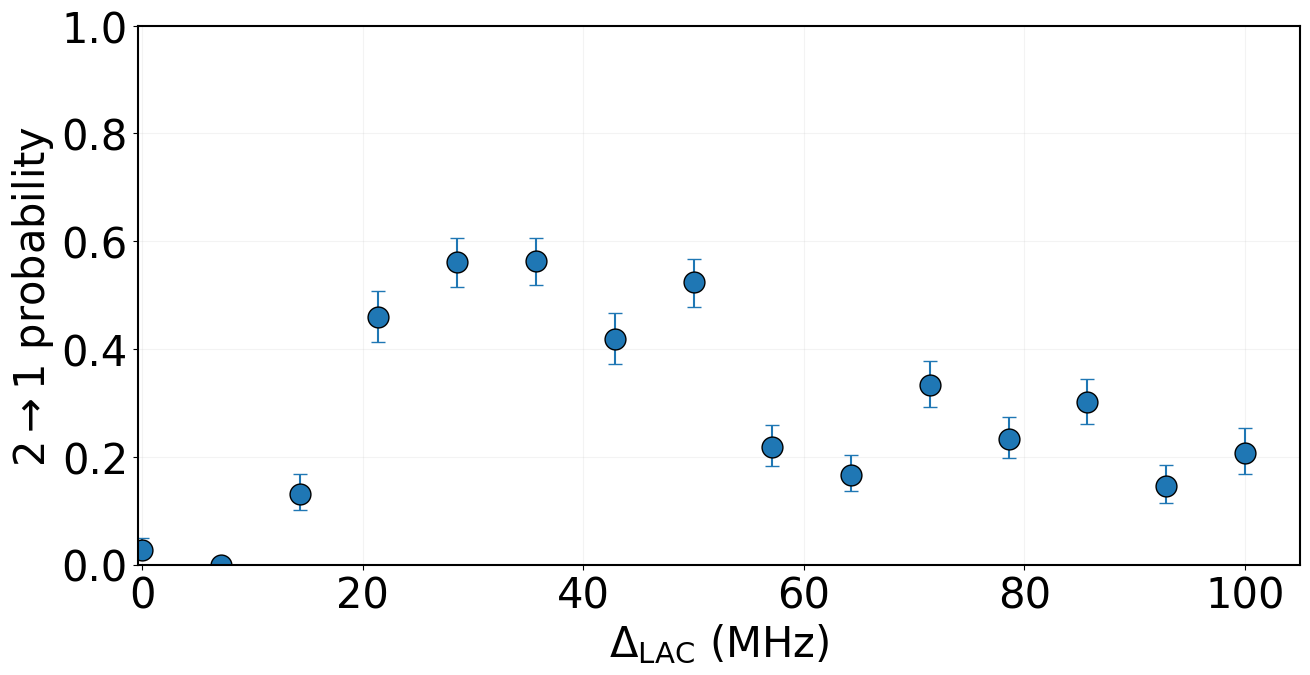

In [266]:
dataset1 = ta.standardTransferAnalysis(49, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 85)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.2
    lo = avgTferErr1[i][1]/1.2
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(49, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 85)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*8
    zeroed_freqs.append(freq)
fig, ax = plt.subplots(figsize=(15, 7))
t = np.linspace(key1[0], max(key1), len(key1))
# ax.errorbar(zeroed_freqs,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='single atom survial')
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$P_{2 \rightarrow 1} \mathrm{probability}$')


# plt.legend(bbox_to_anchor=(.5, 1.001), ncol = 2,prop={'size': 15},frameon=False)
# plt.legend(loc=4, ncol = 2,prop={'size': 10})
plt.ylim(0,1)
plt.xlabel(r'$ \Delta_{\mathrm{LAC}} \  \mathrm{(MHz)}$')
plt.ylabel(r'${2 \rightarrow 1} \ \mathrm{probability}$')
plt.rcParams["axes.linewidth"] = 1.5
ax.set_xlim(left=-.4)
# Define the coordinates and dimensions of the box
x_box = -.2
y_box = 0.0
width_box = 17.0
height_box = 1

# Create the Rectangle patch with transparency
# rect = patches.Rectangle((x_box, y_box), width_box, height_box,
#                          alpha=0.5, facecolor='gainsboro')

# # Add the patch to the plot
# ax.add_patch(rect)

# plt.savefig('detuning.png', dpi=1200,bbox_inches="tight")

## Rate plot

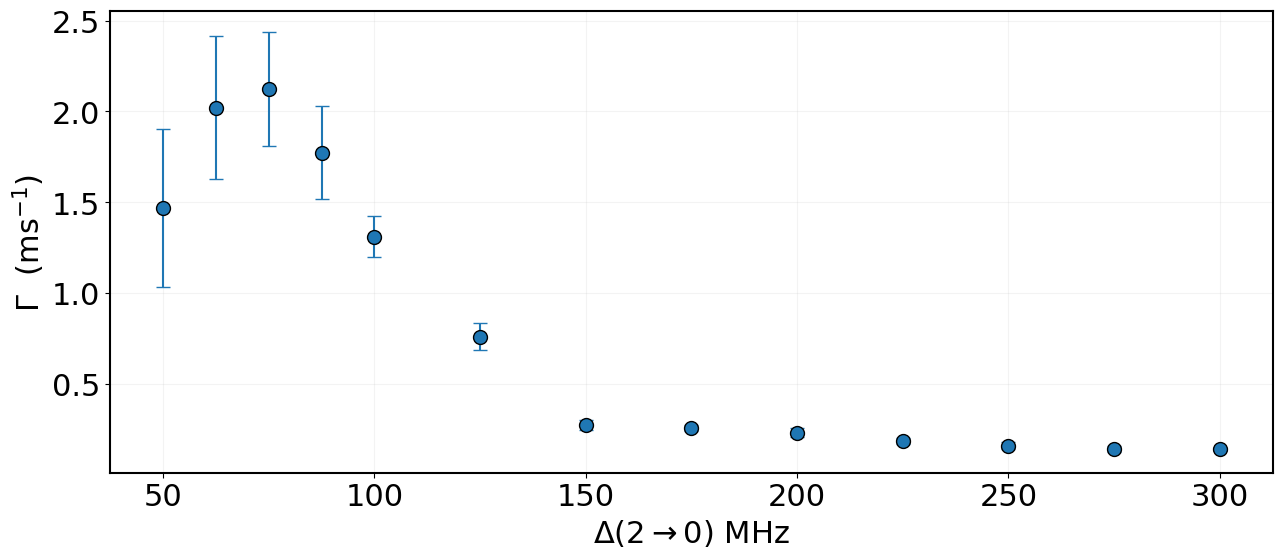

In [32]:
gamma_400 = 0.0688
# gamma_400_unc = 


detuning = [50,62.5,75,87.5,100,125,150,175,200,225,250,275,300]
decay_rate = [gamma_50,gamma_63, gamma_75,gamma_87, gamma_100,gamma_125,gamma_150,gamma_175,
              gamma_200,gamma_225,gamma_250,gamma_275,gamma_300]
decay_rate_unc = [gamma_50_unc,gamma_63_unc,gamma_75_unc,gamma_87_unc,gamma_100_unc,gamma_125_unc,gamma_150_unc,gamma_175_unc,
              gamma_200_unc,gamma_225_unc,gamma_250_unc,gamma_275_unc,gamma_300_unc]


decay_rate_error_bar = [decay_rate_unc,decay_rate_unc]

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(detuning,decay_rate, yerr=decay_rate_error_bar,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
plt.ylabel(r'$ \Gamma \ \ \mathrm{(ms^{-1})} $')
plt.xlabel(r'$ \Delta(2 \rightarrow 0) \ \mathrm{MHz}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

In [33]:
wavelength = 852e-9
waist = 700e-9
rayleigh_range = np.pi*waist**2/wavelength
V = np.pi*waist**2*rayleigh_range
print('Volume = ',V, 'cubic meters')
V_cm = V*1e6
density_cm = 2/V_cm
decay_constant = 1.5 # ms
beta = decay_constant/density_cm*10**3
print('beta = ', rate, 'cm^3s^-1')

Volume =  2.781328658100416e-18 cubic meters


NameError: name 'rate' is not defined

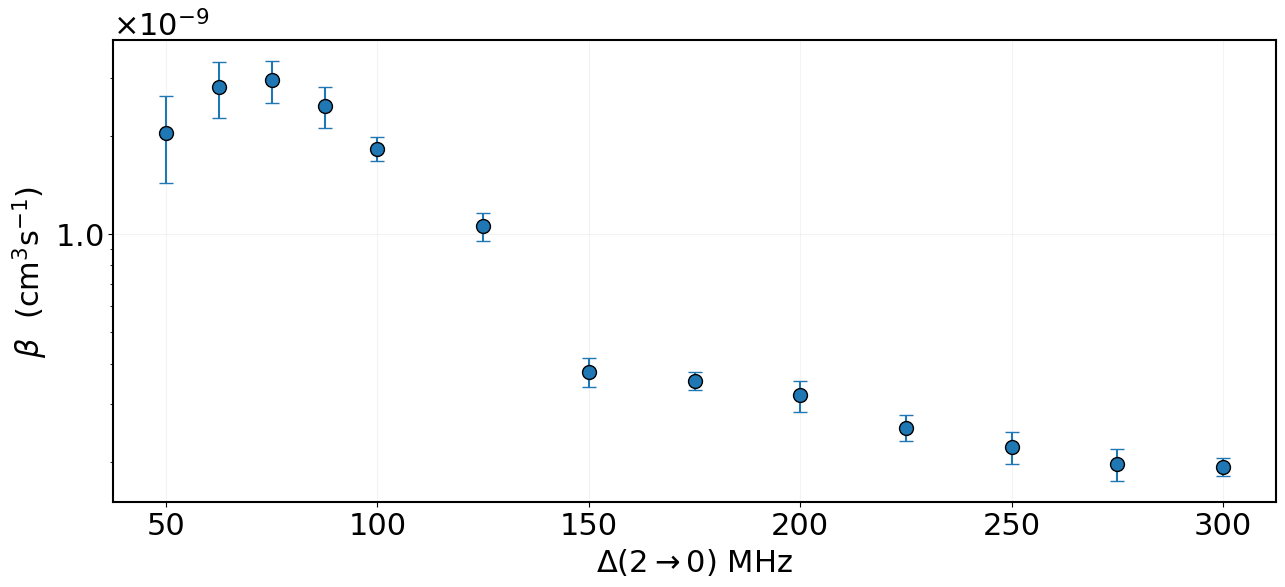

In [35]:
detuning = [50,62.5,75,87.5,100,125,150,175,200,225,250,275,300]
decay_rate = [gamma_50,gamma_63, gamma_75,gamma_87, gamma_100,gamma_125,gamma_150,gamma_175,
              gamma_200,gamma_225,gamma_250,gamma_275,gamma_300]
decay_rate_unc = [gamma_50_unc,gamma_63_unc,gamma_75_unc,gamma_87_unc,gamma_100_unc,gamma_125_unc,gamma_150_unc,gamma_175_unc,
              gamma_200_unc,gamma_225_unc,gamma_250_unc,gamma_275_unc,gamma_300_unc]

decay_rate_error_bar = [decay_rate_unc,decay_rate_unc]

density_cm = 2/V_cm
beta = [gamma/density_cm*10**3 for gamma in decay_rate]
beta_unc = [gamma_unc/density_cm*10**3 for gamma_unc in decay_rate_unc]
beta_error = [beta_unc,beta_unc]
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(detuning,beta, yerr=beta_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)

ax.set_yscale('log')
# Use ScalarFormatter for the y-axis labels
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))  # Adjust the scilimits as needed
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$ \Delta(2 \rightarrow 0) \ \mathrm{MHz}$')
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

In [41]:
beta_scale_err = [i*1e-1 for i in beta_unc]
print(beta_scale_err)

[6.062497005322886e-11, 5.479988793371881e-11, 4.3788289170776755e-11, 3.524348155719319e-11, 1.5603766893702247e-11, 1.0523835644462584e-11, 3.962200419635314e-12, 2.1670390392662163e-12, 3.516997961087749e-12, 2.324558355242349e-12, 2.4611826301284937e-12, 2.1573149522019704e-12, 1.1826020451525185e-12]


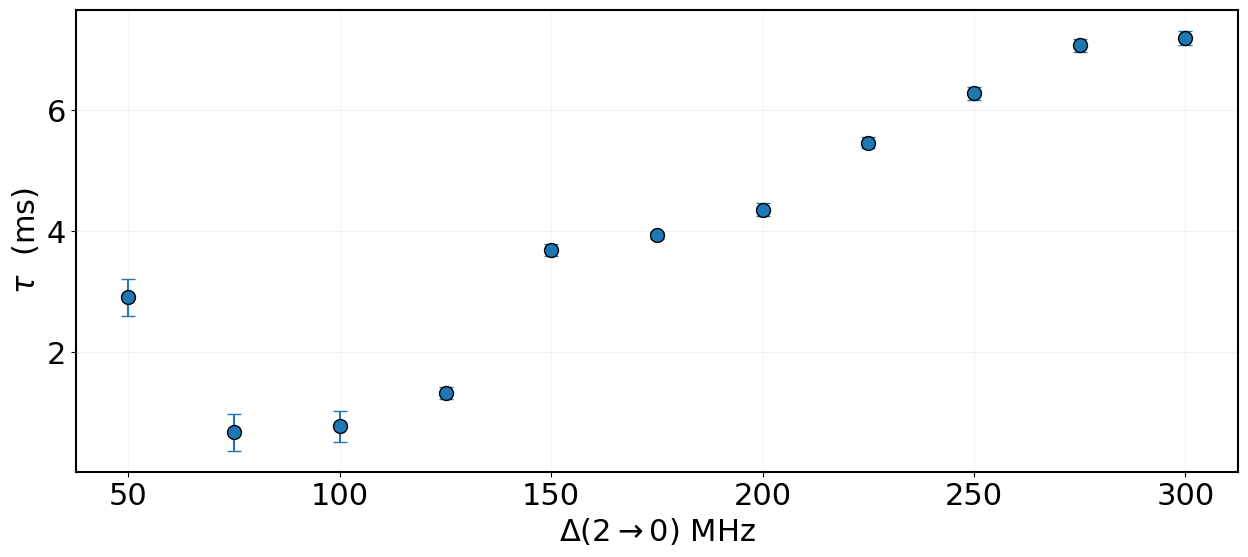

In [152]:
detuning = [50,75,100,125,150,175,200,225,250,275,300]
decay_rate = [gamma_50,gamma_75,gamma_100,gamma_125,gamma_150,gamma_175,
              gamma_200,gamma_225,gamma_250,gamma_275,gamma_300]
decay_rate_unc = [gamma_50_unc,gamma_75_unc,gamma_100_unc,gamma_125_unc,gamma_150_unc,gamma_175_unc,
              gamma_200_unc,gamma_225_unc,gamma_250_unc,gamma_275_unc,gamma_300_unc]

decay_rate_error_bar = [decay_rate_unc,decay_rate_unc]

tau = [tau_50,tau_75,tau_100,tau_125,tau_150,tau_175,
              tau_200,tau_225,tau_250,tau_275,tau_300]
tau_unc = [tau_50_unc,tau_75_unc,tau_100_unc,tau_125_unc,tau_150_unc,tau_175_unc,
              tau_200_unc,tau_225_unc,tau_250_unc,tau_275_unc,tau_300_unc]

tau_error_bar = [tau_unc,tau_unc]

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(detuning,tau, yerr=tau_error_bar,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
plt.ylabel(r'$ \tau \ \ \mathrm{(ms)} $')
plt.xlabel(r'$ \Delta(2 \rightarrow 0) \ \mathrm{MHz}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 